In [1]:
from __future__ import division, print_function, unicode_literals

#common imports 
import pandas as pd
import numpy as np
import os
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("game_train.csv")
test = pd.read_csv("game_test.csv")

In [3]:
train.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
1,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
2,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
3,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
4,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
5,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
6,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
7,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143
8,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.900,1,0,0,64,...,0,0.0000,0,0.00,0,0,451.70,1,0,0.4043
9,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0,0,0.000,0,0,0,37,...,0,6639.0000,0,0.00,0,0,2784.00,6,0,0.9286


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519961 entries, 0 to 3519960
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [5]:
train = train.dropna()
test = test.dropna()

In [6]:
train.shape

(3519960, 29)

# Correlational Matrix

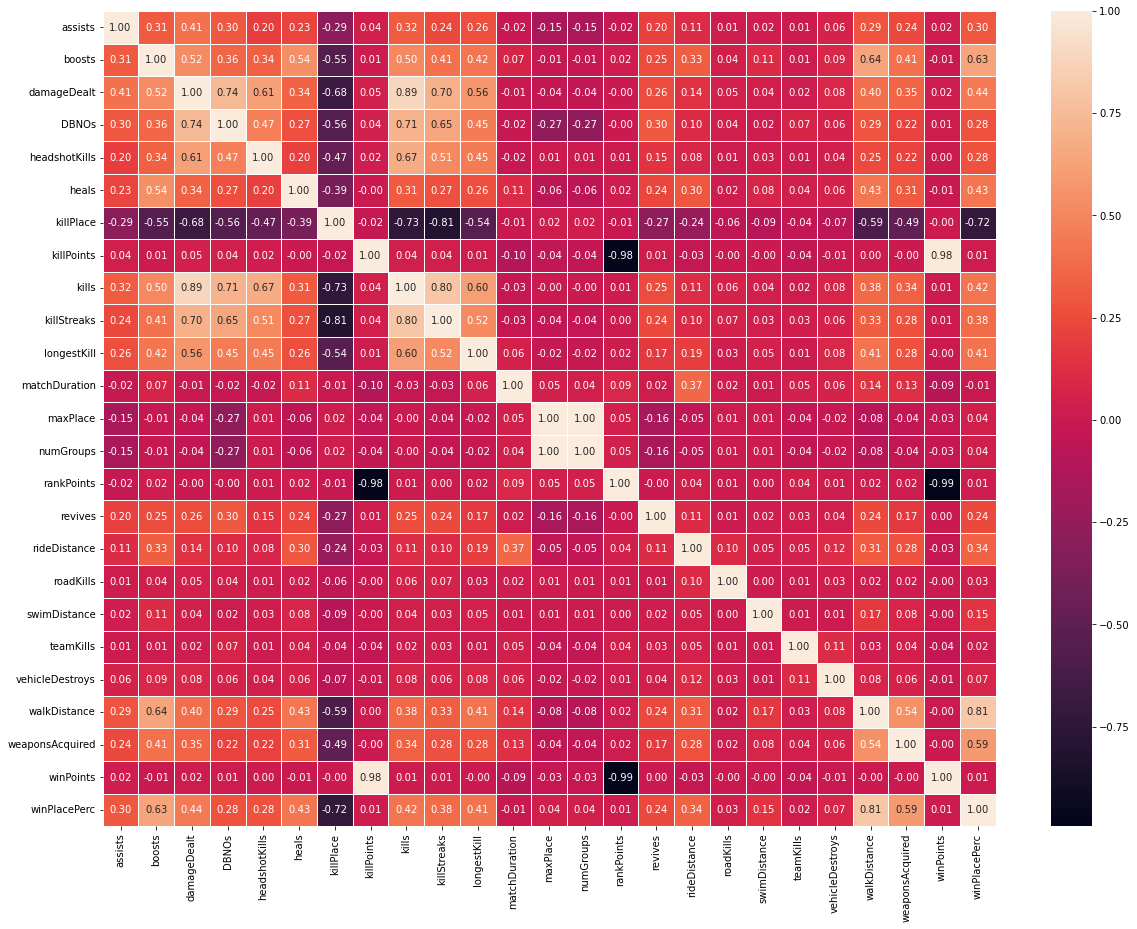

In [7]:
data = train.copy()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.6, fmt= '.2f',ax=ax)
plt.show()

# Walking Distance Distribution

In [8]:
print("The average walk distance, in meters, is:", data["walkDistance"].mean())

The average walk distance, in meters, is: 1153.8358332414373


C:\Users\MD MASUM BILLAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


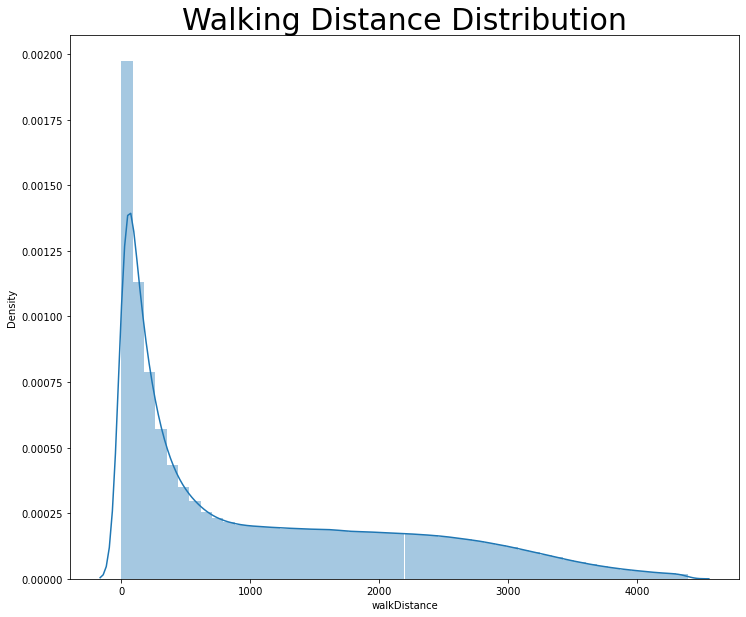

In [9]:
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(12,10))
plt.title("Walking Distance Distribution",fontsize=30)
sns.distplot(data['walkDistance'])
plt.show()

# Kills Distribution

In [10]:
data = train.copy()

0.11.2


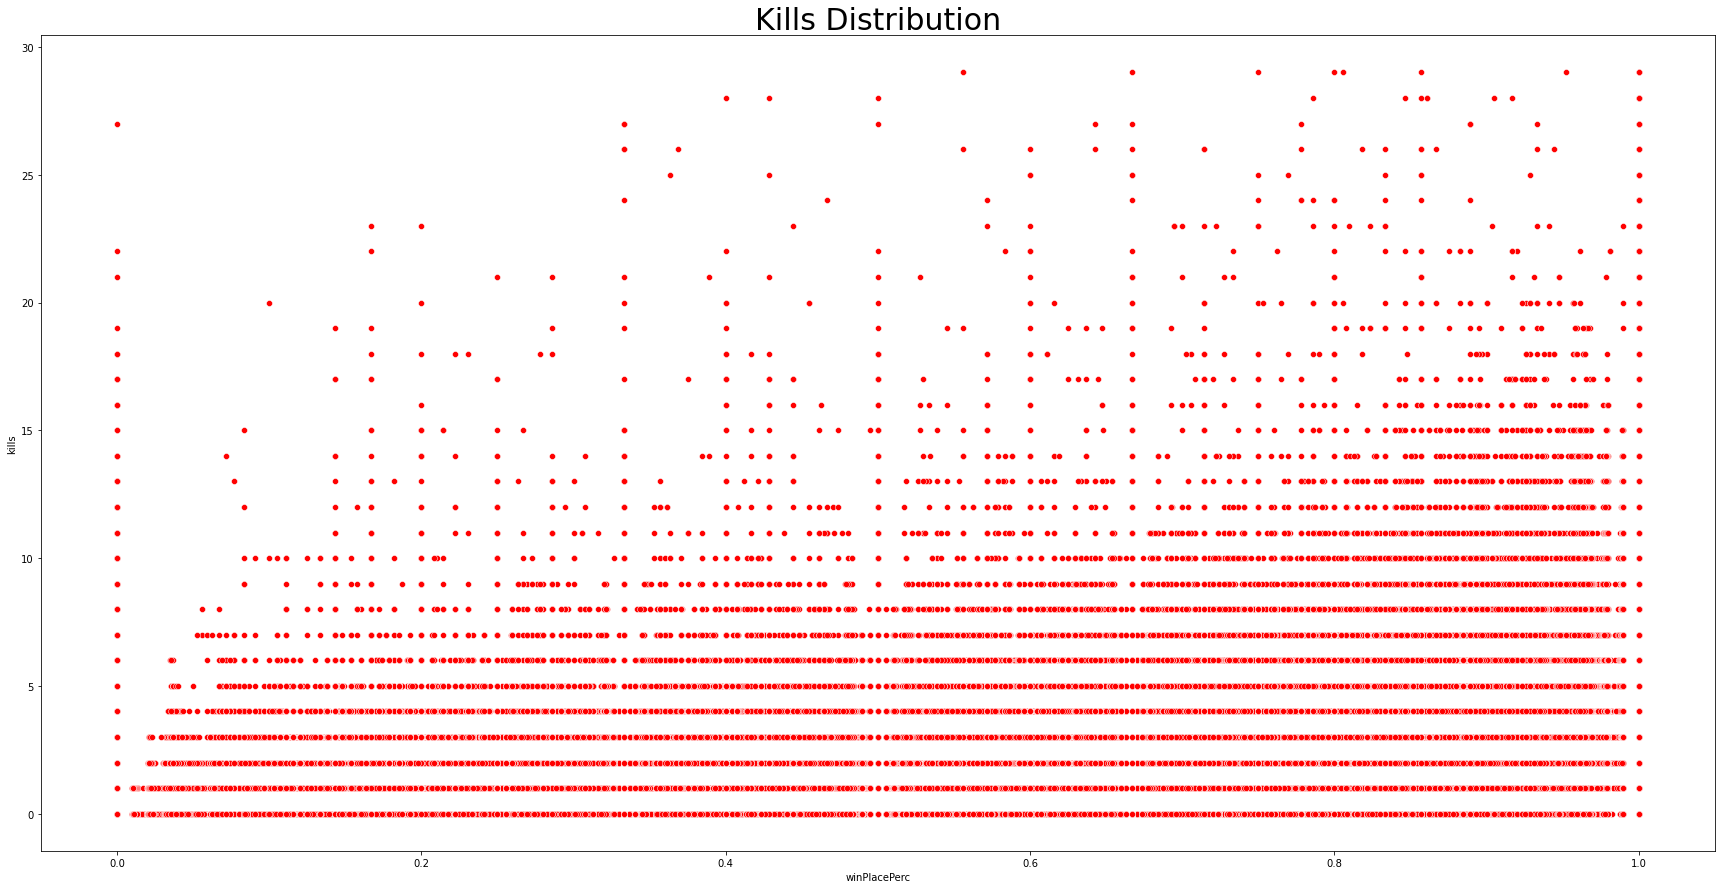

In [11]:
import seaborn as sns
print (sns.__version__)
plt.figure(figsize=(30, 15))
plt.title("Kills Distribution", fontsize=30)
sns.scatterplot(x="winPlacePerc", y="kills", data=data[data["kills"] < 30], color="red")
plt.show()

C:\Users\MD MASUM BILLAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


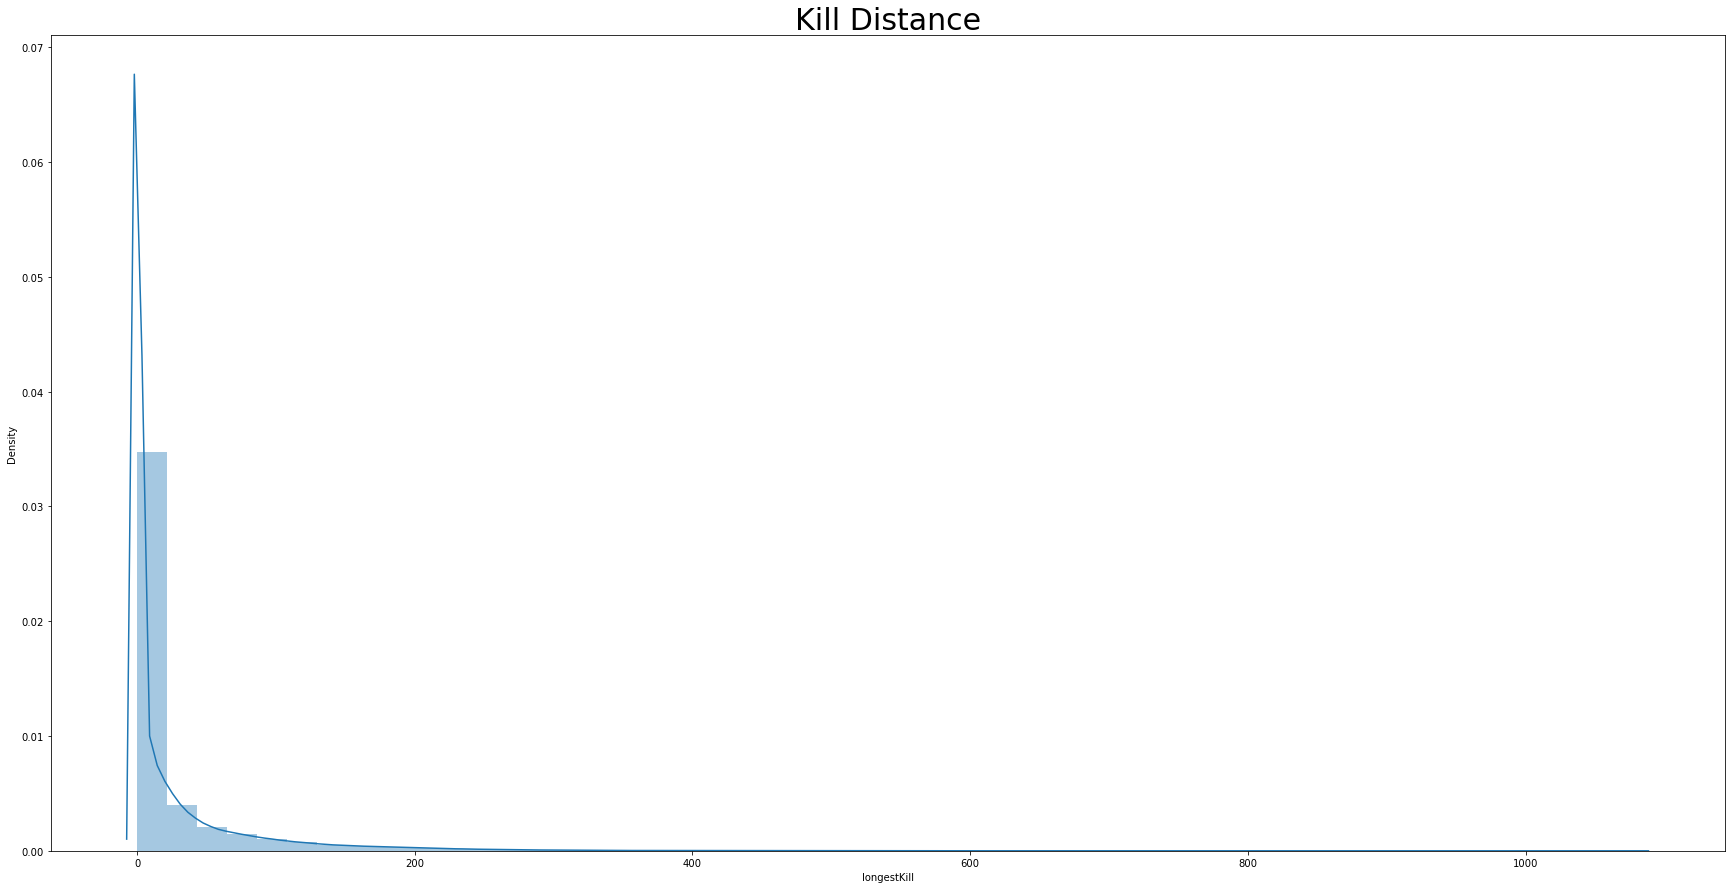

In [12]:
data = train.copy()
plt.figure(figsize=(30, 15))
plt.title("Kill Distance", fontsize = 30)
sns.distplot(data["longestKill"])
plt.show()

# Weapons Acquired

In [13]:
print("The average amount of weapons acquired, per player, in a game is", data["weaponsAcquired"].mean())

The average amount of weapons acquired, per player, in a game is 3.659233911748997


array([[<AxesSubplot:title={'center':'weaponsAcquired'}>]], dtype=object)

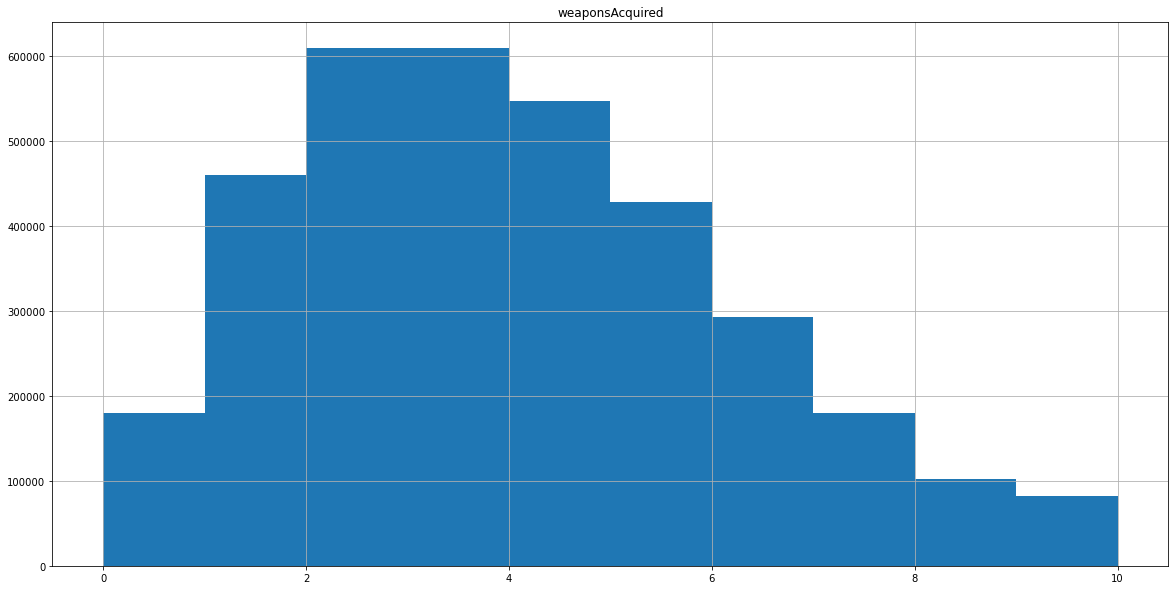

In [14]:
data = train.copy()
data.hist('weaponsAcquired', figsize = (20,10), range=(0, 10))

In [15]:
data = train.copy()

In [16]:
plt.figure(figsize=(30, 15))

<Figure size 2160x1080 with 0 Axes>

<Figure size 2160x1080 with 0 Axes>

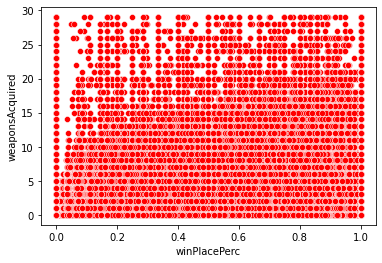

In [17]:
sns.scatterplot(x="winPlacePerc", y="weaponsAcquired", data=data[data["weaponsAcquired"] < 30], color = "red")
plt.show()

# Feature Engineering

In [18]:
train['playersInGame'] = train.groupby('matchId')['matchId'].transform('count')

C:\Users\MD MASUM BILLAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


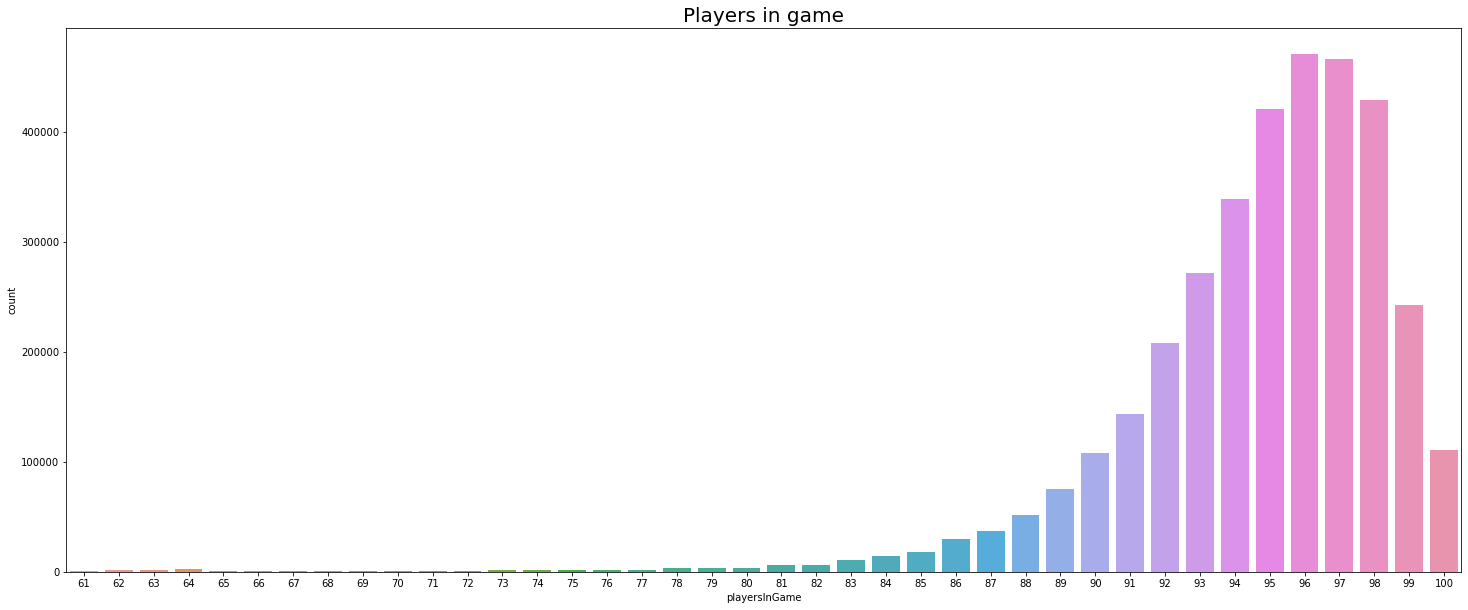

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(train[train['playersInGame']>60]['playersInGame'])
plt.title("Players in game", fontsize=20)
plt.show()

In [20]:
train['killsNorm'] = train['kills']*((100-train['playersInGame'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersInGame'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersInGame'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersInGame'])/100 + 1)

In [21]:
to_show = ['playersInGame','kills','killsNorm','damageDealt', 'damageDealtNorm', 'maxPlace', 'maxPlaceNorm', 'matchDuration', 'matchDurationNorm']
train[to_show][0:10]

,playersInGame,kills,killsNorm,damageDealt,damageDealtNorm,maxPlace,maxPlaceNorm,matchDuration,matchDurationNorm
0,91,0,0.00,91.470,99.70230,26,28.34,1777,1936.93
1,98,0,0.00,68.000,69.36000,50,51.00,1318,1344.36
2,91,0,0.00,32.900,35.86100,31,33.79,1436,1565.24
3,97,1,1.03,100.000,103.00000,97,99.91,1424,1466.72
4,97,0,0.00,0.000,0.00000,28,28.84,1316,1355.48
5,96,0,0.00,8.538,8.87952,96,99.84,1967,2045.68
6,97,0,0.00,51.600,53.14800,28,28.84,1375,1416.25
7,97,0,0.00,37.270,38.38810,29,29.87,1930,1987.90
8,95,0,0.00,137.900,144.79500,48,50.40,1384,1453.20
9,90,0,0.00,0.000,0.00000,29,31.90,1774,1951.40


In [22]:
# get the total distance by adding all the dinstances together
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']

# Outliers (cheaters)

In [23]:
train['killsWithoutMoving'] = ((train['kills']>0)&(train['totalDistance'] == 0))
# remove people who got kills without moving
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

In [24]:
train.drop(train[train['kills'] > 40].index, inplace=True)

In [25]:
#people who have 100% headshot with over 9 kills
train['headshot_rate'] = train['headshotKills']/train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)
display(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape)
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head(15)

(16, 37)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,playersInGame,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,totalDistance,killsWithoutMoving,headshot_rate
223126,ab9d7168570927,add05ebde0214c,e016a873339c7b,2,3,1212.0,8,10,0,1,...,0,0.8462,93,10.70,1296.840,28.89,1522.61,2939.00,False,1.0
689584,e668a25f5488e3,5ba8feabfb2a23,f6e6581e03ba4f,0,4,1365.0,9,13,0,1,...,1587,1.0000,98,13.26,1392.300,27.54,1280.10,2105.00,False,1.0
719410,566d8218b705aa,a9b056478d71b2,3a41552d553583,2,5,1535.0,10,10,3,1,...,1519,0.9630,95,10.50,1611.750,29.40,1929.90,7948.00,False,1.0
762523,1bd6fd288df4f0,90584ffa22fe15,ba2de992ec7bb8,2,6,1355.0,12,10,2,1,...,1562,1.0000,96,10.40,1409.200,28.08,1473.68,3476.00,False,1.0
854152,1c245ed99b5f96,e42d09a9b8463a,5cec236bce68eb,0,5,1218.0,8,11,3,1,...,0,1.0000,95,11.55,1278.900,29.40,1912.05,8178.00,False,1.0
924390,c4f80d4be5c561,b4a7892189b5dd,c7f7733ebbd447,0,4,1065.0,6,10,1,1,...,1468,1.0000,97,10.30,1096.950,27.81,1283.38,2858.90,False,1.0
1283942,7ef0d4adf33d2e,c76984ab16e2cb,9b340203c52b43,3,4,1398.0,8,10,2,1,...,1558,1.0000,94,10.60,1481.880,28.62,1311.22,3114.42,False,1.0
1388180,74e268b6d4870b,53bfcb6d8229f6,36579d5c2e52bc,0,7,1503.0,0,15,2,1,...,0,1.0000,98,15.30,1533.060,99.96,1939.02,5008.00,False,1.0
1786916,d8474df8d8283a,50c8a5b906d89d,c6da477a07f4aa,0,7,1569.0,0,14,0,1,...,0,1.0000,95,14.70,1647.450,99.75,2062.20,4994.00,False,1.0
1880912,48bd6fdf8719a4,d8a6b7a95481d8,360caa30aabd16,0,8,1290.0,0,14,1,1,...,1500,0.9897,98,14.28,1315.800,99.96,1360.68,2993.40,False,1.0


C:\Users\MD MASUM BILLAL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


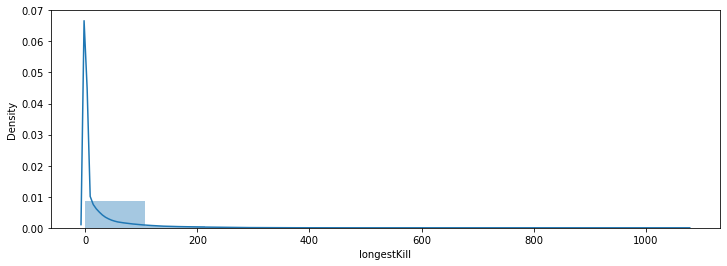

In [26]:
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

In [27]:
# drop the people who have kills from an insane distance. it makes no sense how they would get these kills. prob cheaters. 
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)

In [28]:
print('There are {} different Match types in the dataset.'.format(train['matchType'].nunique()))
print(train['matchType'].value_counts())

There are 16 different Match types in the dataset.
squad-fpp           1388325
duo-fpp              783147
squad                496036
solo-fpp             427904
duo                  250999
solo                 146072
normal-squad-fpp      12692
normal-duo-fpp         4392
crashfpp               4300
flaretpp               1839
normal-solo-fpp        1143
flarefpp                718
normal-squad            453
crashtpp                312
normal-solo             216
normal-duo              161
Name: matchType, dtype: int64


In [29]:
print(train['matchType'].value_counts())
train.shape

squad-fpp           1388325
duo-fpp              783147
squad                496036
solo-fpp             427904
duo                  250999
solo                 146072
normal-squad-fpp      12692
normal-duo-fpp         4392
crashfpp               4300
flaretpp               1839
normal-solo-fpp        1143
flarefpp                718
normal-squad            453
crashtpp                312
normal-solo             216
normal-duo              161
Name: matchType, dtype: int64


(3518709, 37)

In [30]:
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')
train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

train.drop(columns=['groupId', 'matchId'], inplace=True)

train[['groupId_cat', 'matchId_cat']].head()

,groupId_cat,matchId_cat
0,656337,25979
1,668721,2499
2,1062346,35841
3,1393413,16240
4,278806,24950


In [31]:
train.drop(['Id','matchType'], axis=1, inplace=True)
#would want to go back and re add matchtype and mayve only look at 1 match type

In [32]:
train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,playersInGame,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,totalDistance,killsWithoutMoving,headshot_rate,groupId_cat,matchId_cat
0,0,0,91.47,0,0,0,57,0,0,0,...,91,0.00,99.7023,28.34,1936.93,1445.0445,False,0.0,656337,25979
1,1,0,68.00,0,0,0,47,0,0,0,...,98,0.00,69.3600,51.00,1344.36,161.8000,False,0.0,668721,2499
2,0,0,32.90,0,0,0,75,0,0,0,...,91,0.00,35.8610,33.79,1565.24,202.7000,False,0.0,1062346,35841
3,0,0,100.00,0,0,0,45,0,1,1,...,97,1.03,103.0000,99.91,1466.72,49.7500,False,0.0,1393413,16240
4,0,0,0.00,0,0,0,96,1262,0,0,...,97,0.00,0.0000,28.84,1355.48,13.5000,False,0.0,278806,24950


In [33]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3518709 entries, 0 to 3519960
Data columns (total 35 columns):
 #   Column              Dtype  
---  ------              -----  
 0   assists             int64  
 1   boosts              int64  
 2   damageDealt         float64
 3   DBNOs               int64  
 4   headshotKills       int64  
 5   heals               int64  
 6   killPlace           int64  
 7   killPoints          int64  
 8   kills               int64  
 9   killStreaks         int64  
 10  longestKill         float64
 11  matchDuration       int64  
 12  maxPlace            int64  
 13  numGroups           int64  
 14  rankPoints          int64  
 15  revives             int64  
 16  rideDistance        float64
 17  roadKills           int64  
 18  swimDistance        float64
 19  teamKills           int64  
 20  vehicleDestroys     int64  
 21  walkDistance        float64
 22  weaponsAcquired     int64  
 23  winPoints           int64  
 24  winPlacePerc        floa

# Machine Learning 

In [34]:
X = train.copy()
y = X['winPlacePerc']
X = X.drop(columns = ['winPlacePerc']) 
#X.shape
print("the size of the traning data is {0} x {1} and label size {2}".format(X.shape[0], X.shape[1], y.shape[0]))
#print("the size of the target is {0} ".format(y.shape))
y.head(15)

the size of the traning data is 3518709 x 34 and label size 3518709


0     0.6400
1     0.7755
2     0.1667
3     0.1875
4     0.0000
5     0.7368
6     0.3704
7     0.2143
8     0.4043
9     0.9286
10    0.8750
11    0.9000
12    0.2766
13    0.7308
14    0.8211
Name: winPlacePerc, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2814967 entries, 866908 to 2402268
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   assists             int64  
 1   boosts              int64  
 2   damageDealt         float64
 3   DBNOs               int64  
 4   headshotKills       int64  
 5   heals               int64  
 6   killPlace           int64  
 7   killPoints          int64  
 8   kills               int64  
 9   killStreaks         int64  
 10  longestKill         float64
 11  matchDuration       int64  
 12  maxPlace            int64  
 13  numGroups           int64  
 14  rankPoints          int64  
 15  revives             int64  
 16  rideDistance        float64
 17  roadKills           int64  
 18  swimDistance        float64
 19  teamKills           int64  
 20  vehicleDestroys     int64  
 21  walkDistance        float64
 22  weaponsAcquired     int64  
 23  winPoints           int64  
 24  playersInGame      

In [37]:
#this either?
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

In [38]:
from sklearn.neural_network import MLPClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD

ModuleNotFoundError: No module named 'keras'